<a href="https://colab.research.google.com/github/umiSirya/Weather_Prediction_capstone_project/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import the Necessary Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load and Prepare the Dataset**

In [5]:
df=pd.read_csv('/content/result.csv')
df.head()

,Y,X,uv_index_hourly_average,url,dataset,instance_datetime,platform_id,platform_name,country,gaw_id,instrument_name,instrument_model,instrument_number,uv_index_qa,instance_hour,platform_type,data_payload_id,latest_observation,uv_index_daily_max,agency
0,45.803,8.627,0.294733,https://woudc.org/archive/Archive-NewFormat/Sp...,spectral,2004/12/30 00:00:00,301,Ispra,ITA,IPR,brewer,MKIV,66,P,NaN,STN,1589193,0,0.294733,JRC_EU
1,45.803,8.627,0.009093,https://woudc.org/archive/Archive-NewFormat/Sp...,spectral,2004/12/30 00:00:00,301,Ispra,ITA,IPR,brewer,MKIV,66,P,7.0,STN,1589026,0,0.294733,JRC_EU
2,45.803,8.627,0.006105,https://woudc.org/archive/Archive-NewFormat/Sp...,spectral,2004/12/29 00:00:00,301,Ispra,ITA,IPR,brewer,MKIV,66,P,7.0,STN,1588736,0,0.189241,JRC_EU
3,45.803,8.627,0.189241,https://woudc.org/archive/Archive-NewFormat/Sp...,spectral,2004/12/29 00:00:00,301,Ispra,ITA,IPR,brewer,MKIV,66,P,NaN,STN,1588915,0,0.189241,JRC_EU
4,45.803,8.627,0.001925,https://woudc.org/archive/Archive-NewFormat/Sp...,spectral,2004/12/28 00:00:00,301,Ispra,ITA,IPR,brewer,MKIV,66,P,7.0,STN,1588465,0,0.141356,JRC_EU


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Y                        3562 non-null   float64
 1   X                        3562 non-null   float64
 2   uv_index_hourly_average  3562 non-null   float64
 3   url                      3562 non-null   object 
 4   dataset                  3562 non-null   object 
 5   instance_datetime        3562 non-null   object 
 6   platform_id              3562 non-null   int64  
 7   platform_name            3562 non-null   object 
 8   country                  3562 non-null   object 
 9   gaw_id                   3562 non-null   object 
 10  instrument_name          3562 non-null   object 
 11  instrument_model         3562 non-null   object 
 12  instrument_number        3562 non-null   int64  
 13  uv_index_qa              3562 non-null   object 
 14  instance_hour           

# **3. Data Cleaning**

In [7]:
# Convertdate column is in datetime format
df['instance_date'] = pd.to_datetime(df['instance_datetime'])

# Sort the DataFrame by date in ascending order
df = df.sort_values(by='instance_date', ascending=True).reset_index(drop=True)

# Choosing relevant columns
df = df[['instance_date', 'uv_index_daily_max']]

# Keep only the first row for each date
df = df.drop_duplicates(subset='instance_date', keep='first').reset_index(drop=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instance_date       1786 non-null   datetime64[ns]
 1   uv_index_daily_max  1786 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.0 KB


In [8]:
#checking for null values
df.isnull().sum()

,0
instance_date,0
uv_index_daily_max,0


In [10]:
print(df.head())

  instance_date  uv_index_daily_max
0    1999-12-31            0.304709
1    2000-01-01            0.316398
2    2000-01-02            0.329537
3    2000-01-03            0.388613
4    2000-01-04            0.384048


In [11]:
print(df.tail())

     instance_date  uv_index_daily_max
1781    2004-12-26            0.075711
1782    2004-12-27            0.246608
1783    2004-12-28            0.141356
1784    2004-12-29            0.189241
1785    2004-12-30            0.294733


In [12]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instance_date       1786 non-null   datetime64[ns]
 1   uv_index_daily_max  1786 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.0 KB


In [13]:
df['uv_index_daily_max'].describe()


,uv_index_daily_max
count,1786.000000
mean,0.862763
std,0.614323
min,0.000843
25%,0.316474
50%,0.720044
75%,1.375860
max,3.437900


<ipython-input-14-597bd890e5d9>:23: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


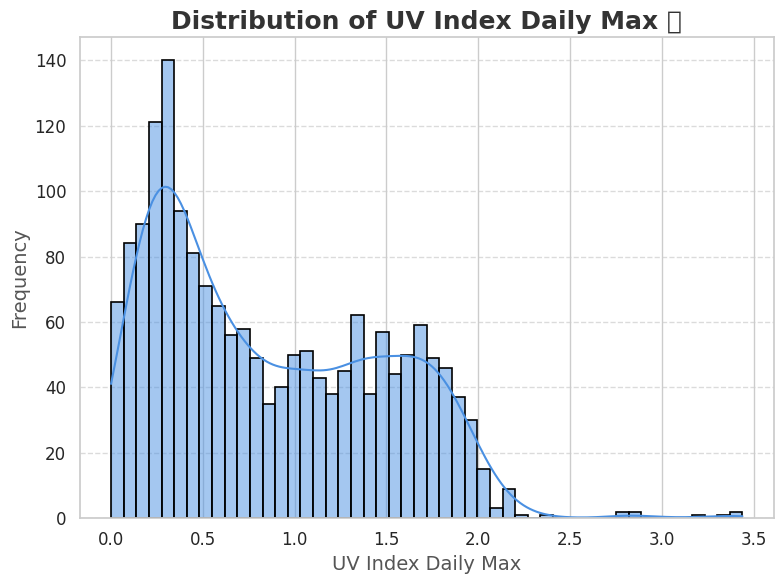

In [14]:
#Frequency Distribution of UV Index daily max

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(
    data=df,
    x='uv_index_daily_max',
    bins=50,
    kde=True,
    color="#4A90E2",
    edgecolor="black",
    linewidth=1.2
)


plt.title('Distribution of UV Index Daily Max 🌞', fontsize=18, fontweight='bold', color="#333333")
plt.xlabel('UV Index Daily Max', fontsize=14, color="#555555")
plt.ylabel('Frequency', fontsize=14, color="#555555")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
# saving cleaned data into a csv file
df.to_csv('cleaned_uv_data.csv', index=False)
